In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
def read_data(path, nrows=10000):
    df = pd.read_json(path, lines=True, nrows=nrows)
    return df

In [3]:
df = read_data('../data/raw/corpus-webis-tldr-17.json', nrows=10000)

In [4]:
# Summary statistics
df.head()

,author,body,normalizedBody,content,content_len,summary,summary_len,id,subreddit,subreddit_id,title
0,raysofdarkmatter,I think it should be fixed on either UTC stand...,I think it should be fixed on either UTC stand...,I think it should be fixed on either UTC stand...,178,Shifting seasonal time is no longer worth it.,8,c69al3r,math,t5_2qh0n,NaN
1,Stork13,Art is about the hardest thing to categorize i...,Art is about the hardest thing to categorize i...,Art is about the hardest thing to categorize i...,148,Personal opinions 'n shit.,4,c6a9nxd,funny,t5_2qh33,NaN
2,Cloud_dreamer,Ask me what I think about the Wall Street Jour...,Ask me what I think about the Wall Street Jour...,Ask me what I think about the Wall Street Jour...,76,insults and slack ass insight. \n Wall Street ...,73,c6acx4l,Borderlands,t5_2r8cd,NaN
3,NightlyReaper,"In Mechwarrior Online, I have begun to use a m...","In Mechwarrior Online, I have begun to use a m...","In Mechwarrior Online, I have begun to use a m...",213,"Yes, Joysticks in modern games have apparently...",19,c8onqew,gamingpc,t5_2sq2y,NaN
4,NuffZetPand0ra,"You are talking about the Charsi imbue, right?...","You are talking about the Charsi imbue, right?...","You are talking about the Charsi imbue, right?...",404,Class only items dropped from high-lvl monsters.,7,c6acxvc,Diablo,t5_2qore,D2 help?


/Volumes/Rayla/Projects/SeniorProject/env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


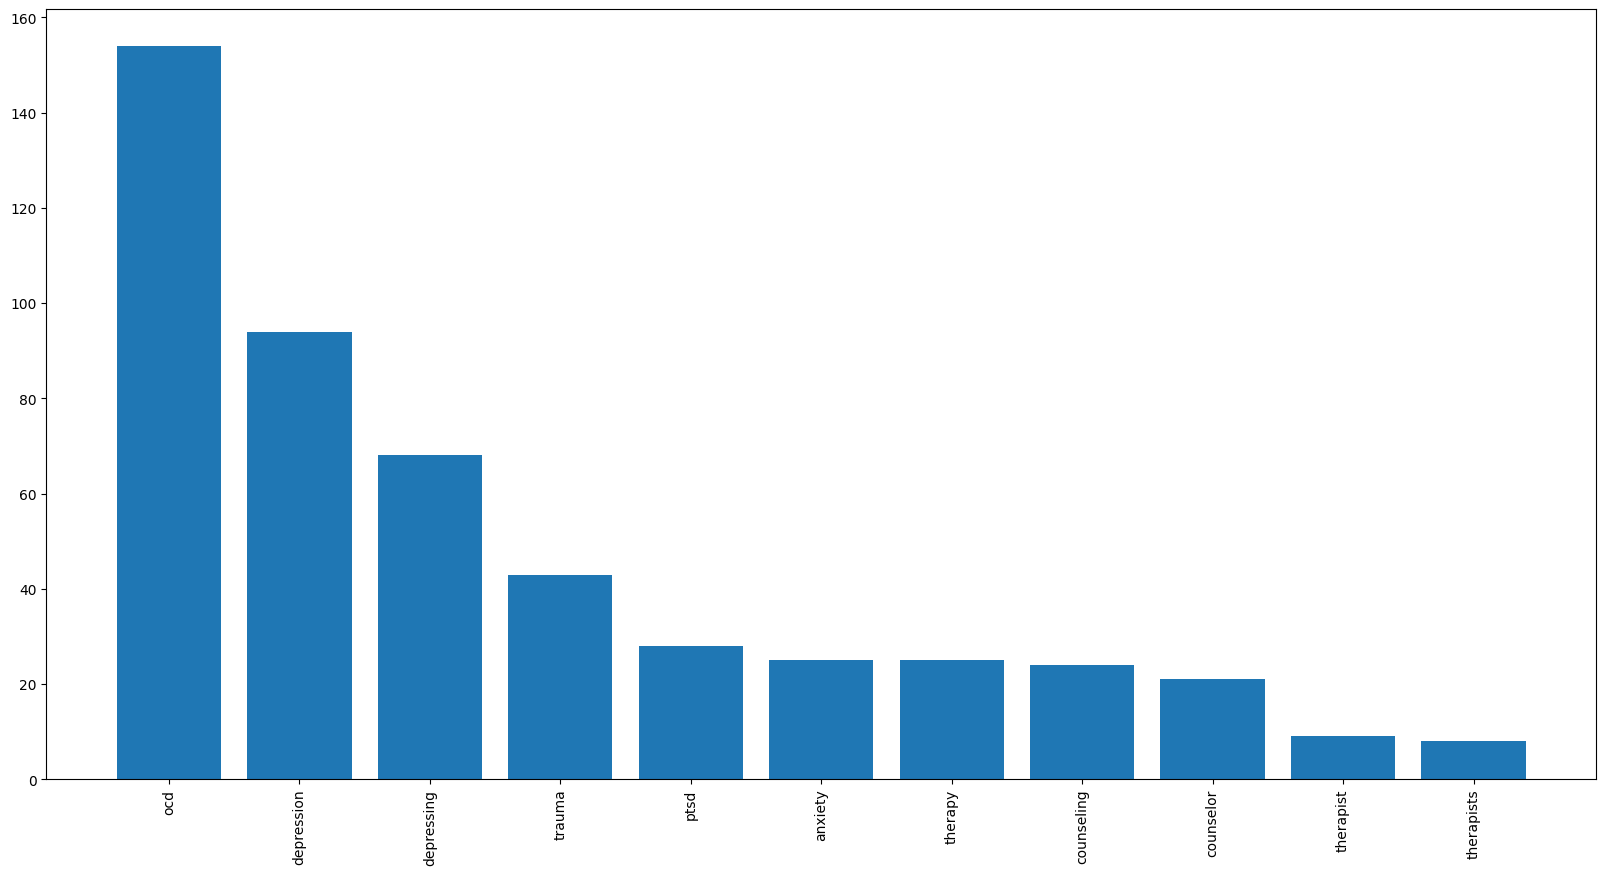

In [8]:
# count vectorize the normalized text and plot the top 20 words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english', strip_accents='ascii')
cv.fit(df['normalizedBody'])
word_count = pd.DataFrame(cv.transform(df['normalizedBody']).toarray(), columns=cv.get_feature_names())
count_per_word = dict(zip(word_count.columns, word_count.sum(axis=0)))
# count_per_word = sorted(count_per_word, key=lambda x: x[1], reverse=True)
therapy_words = ['ocd', 'depression', 'depressing', 'trauma', 'ptsd', 'anxiety', 'therapy', 'counseling', 'counselor', 'therapist', 'therapists']
therapy_words = [x for x in therapy_words if x in word_count.columns]
therapy_words_filter = sorted([count_per_word[tw] for tw in therapy_words])[::-1]
plt.figure(figsize=(20,10))
plt.bar(therapy_words, therapy_words_filter)
plt.xticks(rotation=90)
plt.show()
# top_therapy_words = zip(*sorted(zip(therapy_words, word_count[therapy_words].sum(axis=0)), key=lambda x: x[1], reverse=True))
# plt.figure(figsize=(10, 5))
# plt.bar(*top_therapy_words)
# word_count.sum().sort_values(ascending=False).head(20)
# word_count.sum().sort_values(ascending=False).head(20).plot(kind='barh')

Text(0.5, 1.0, 'Distribution of the number of words in the normalized text')

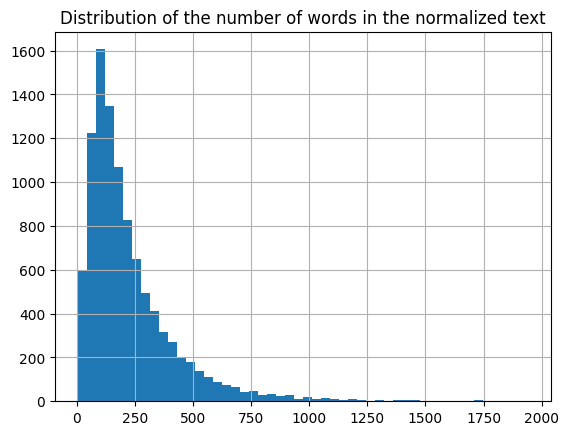

In [5]:
# plot the distribution of the number of words in the normalized text
df['normalizedBody'].str.split().apply(len).hist(bins=50)
plt.title('Distribution of the number of words in the normalized text')

In [6]:
common_therapy_speak_words = ['ocd', 'depression',  'trauma', 'ptsd', 'traumatic', 'triggered']
df['therapy_speak'] = df['normalizedBody'].apply(lambda v: ",".join([i for i in common_therapy_speak_words if i in  v]))
# .str.contains('|'.join(common_therapy_speak_words), case=False)

In [7]:
df.head()

,author,body,normalizedBody,content,content_len,summary,summary_len,id,subreddit,subreddit_id,title,therapy_speak
0,raysofdarkmatter,I think it should be fixed on either UTC stand...,I think it should be fixed on either UTC stand...,I think it should be fixed on either UTC stand...,178,Shifting seasonal time is no longer worth it.,8,c69al3r,math,t5_2qh0n,NaN,[]
1,Stork13,Art is about the hardest thing to categorize i...,Art is about the hardest thing to categorize i...,Art is about the hardest thing to categorize i...,148,Personal opinions 'n shit.,4,c6a9nxd,funny,t5_2qh33,NaN,[]
2,Cloud_dreamer,Ask me what I think about the Wall Street Jour...,Ask me what I think about the Wall Street Jour...,Ask me what I think about the Wall Street Jour...,76,insults and slack ass insight. \n Wall Street ...,73,c6acx4l,Borderlands,t5_2r8cd,NaN,[]
3,NightlyReaper,"In Mechwarrior Online, I have begun to use a m...","In Mechwarrior Online, I have begun to use a m...","In Mechwarrior Online, I have begun to use a m...",213,"Yes, Joysticks in modern games have apparently...",19,c8onqew,gamingpc,t5_2sq2y,NaN,[]
4,NuffZetPand0ra,"You are talking about the Charsi imbue, right?...","You are talking about the Charsi imbue, right?...","You are talking about the Charsi imbue, right?...",404,Class only items dropped from high-lvl monsters.,7,c6acxvc,Diablo,t5_2qore,D2 help?,[]


<AxesSubplot: >

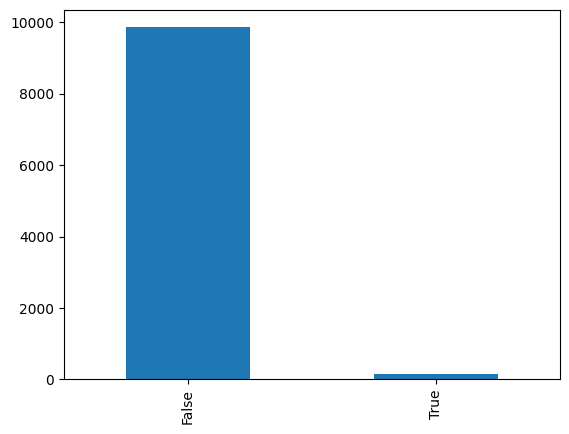

In [26]:
# plot the distribution of therapy_speak in the normalized text
df['therapy_speak'].value_counts().plot(kind='bar')

In [ ]:
# count number of occurrences of each therapy speak word in the 

<AxesSubplot: >

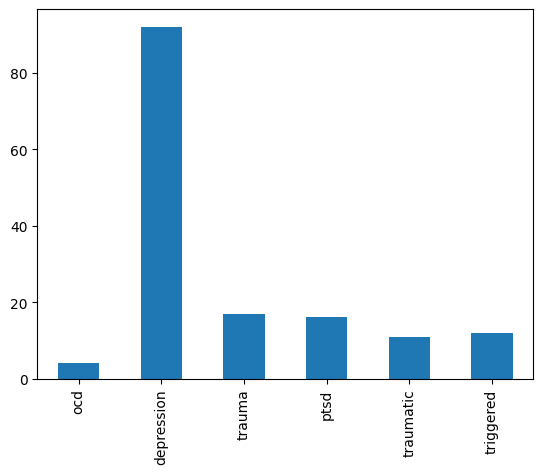

In [27]:
# count the number of times each common therapy speak word appears in the normalized text
# and plot a scaled bar chart
df['normalizedBody'].str.lower().str.split().explode().value_counts().loc[common_therapy_speak_words].plot(kind='bar')
# df['normalizedBody'].str.lower().str.split().explode().value_counts().loc[common_therapy_speak_words].head(20).plot(kind='bar')
#df['normalizedBody'].str.lower().str.split().apply(lambda x: [item for item in x if item in common_therapy_speak_words]).apply(len).value_counts().plot(kind='bar')

In [3]:
books = pd.read_csv('../data/metadata/year_published.csv')

In [4]:
# select all books where year == 1111
defects = books[books['year_published'] == 1111]

In [5]:
defects

,year_published,filename,title
18,1111,healingtoolbox-42-book-booklet-descriptions-fr...,Healingtoolbox 42 book booklet descriptions fr...
25,1111,the-inner-world.epub.txt,The inner world
36,1111,the-jack-in-a-box.epub.txt,The jack in a box
53,1111,the-adventures-of-nick-mane-private-detective-...,The adventures of nick mane private detective ...
138,1111,what-love-can-do-oneill-brothers.epub.txt,What love can do oneill brothers
...,...,...,...
17757,1111,the-way-of-the-fairy-godmother.epub.txt,The way of the fairy godmother
17779,1111,pilgrimage.epub.txt,Pilgrimage
17845,1111,the-zombies-of-lancaster.epub.txt,The zombies of lancaster
17855,1111,persister-space-funding-crisis-i.epub.txt,Persister space funding crisis i
